# Benchmarking different preprocessing techniques

In [1]:
#dependencies
import numpy as np
import pandas as pd
import neurokit as nk
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (40.0, 30.0)  # Make figures a bit bigger

Populating the interactive namespace from numpy and matplotlib


## ECG signals 

1. fMRI - ScannerON : signal is maximally polluted
2. off - ScannerOFF : signal is not polluted - same participant
3. mock - ScannerOFF : signal is not polluted - other participant

In [3]:
# sampling rate of these signals is 5kHz
ecg_fmri=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11.txt')


ecg_off=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11_clean.txt')


# sampling rate of this signal is 10kHz
ecg_mock=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/mockExperiment/mockExp_sangfroisPart2.txt')



1048560

## Preprocessing algorithm includes :

### Filter type : 
* FIR - Finite impulse response : Ripples are of finite length

### Filter frequency :
* ecg_fMRI has a lower low pass frequency cut-off (17Hz vs 45Hz) to seprate the QRS energy spectrum from noise. Thakor et al. 1984

### Segmenter :
* Pekkanen is chosen for its multiple nonlinear transformations that make detection of heartbeats more reliable. First order gaussian differentiator method. Kathirvel et al. 2001, 2011

* Compare with Hamilton, Gamboa, Christov and Engzee

In [7]:
preproc_fmri = nk.bio.ecg_preprocess(ecg_fmri, sampling_rate=5000, filter_type="FIR", filter_band="bandpass", 
                                     filter_frequency=[3, 17], filter_order=0.3, segmenter="pekkanen")


In [9]:
preproc_off = nk.bio.ecg_preprocess(ecg_off, sampling_rate=5000, filter_type="FIR", filter_band="bandpass", 
                                    filter_frequency=[3, 45], filter_order=0.3, segmenter="pekkanen")


In [11]:
preproc_mock = nk.bio.ecg_preprocess(ecg_mock, sampling_rate=10000, filter_type="FIR", filter_band="bandpass", 
                                     filter_frequency=[3, 45], filter_order=0.3, segmenter="pekkanen")


## Look at the extracted cardiac cycles
Quick comparison between detection performance for each signal

In [12]:
preproc_fmri.keys()

dict_keys(['df', 'ECG'])

In [13]:
preproc_fmri['ECG'].keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends'])

In [14]:
fmri_cycles = preproc_fmri['ECG']['Cardiac_Cycles']
off_cycles = preproc_off['ECG']['Cardiac_Cycles']
mock_cycles = preproc_mock['ECG']['Cardiac_Cycles']

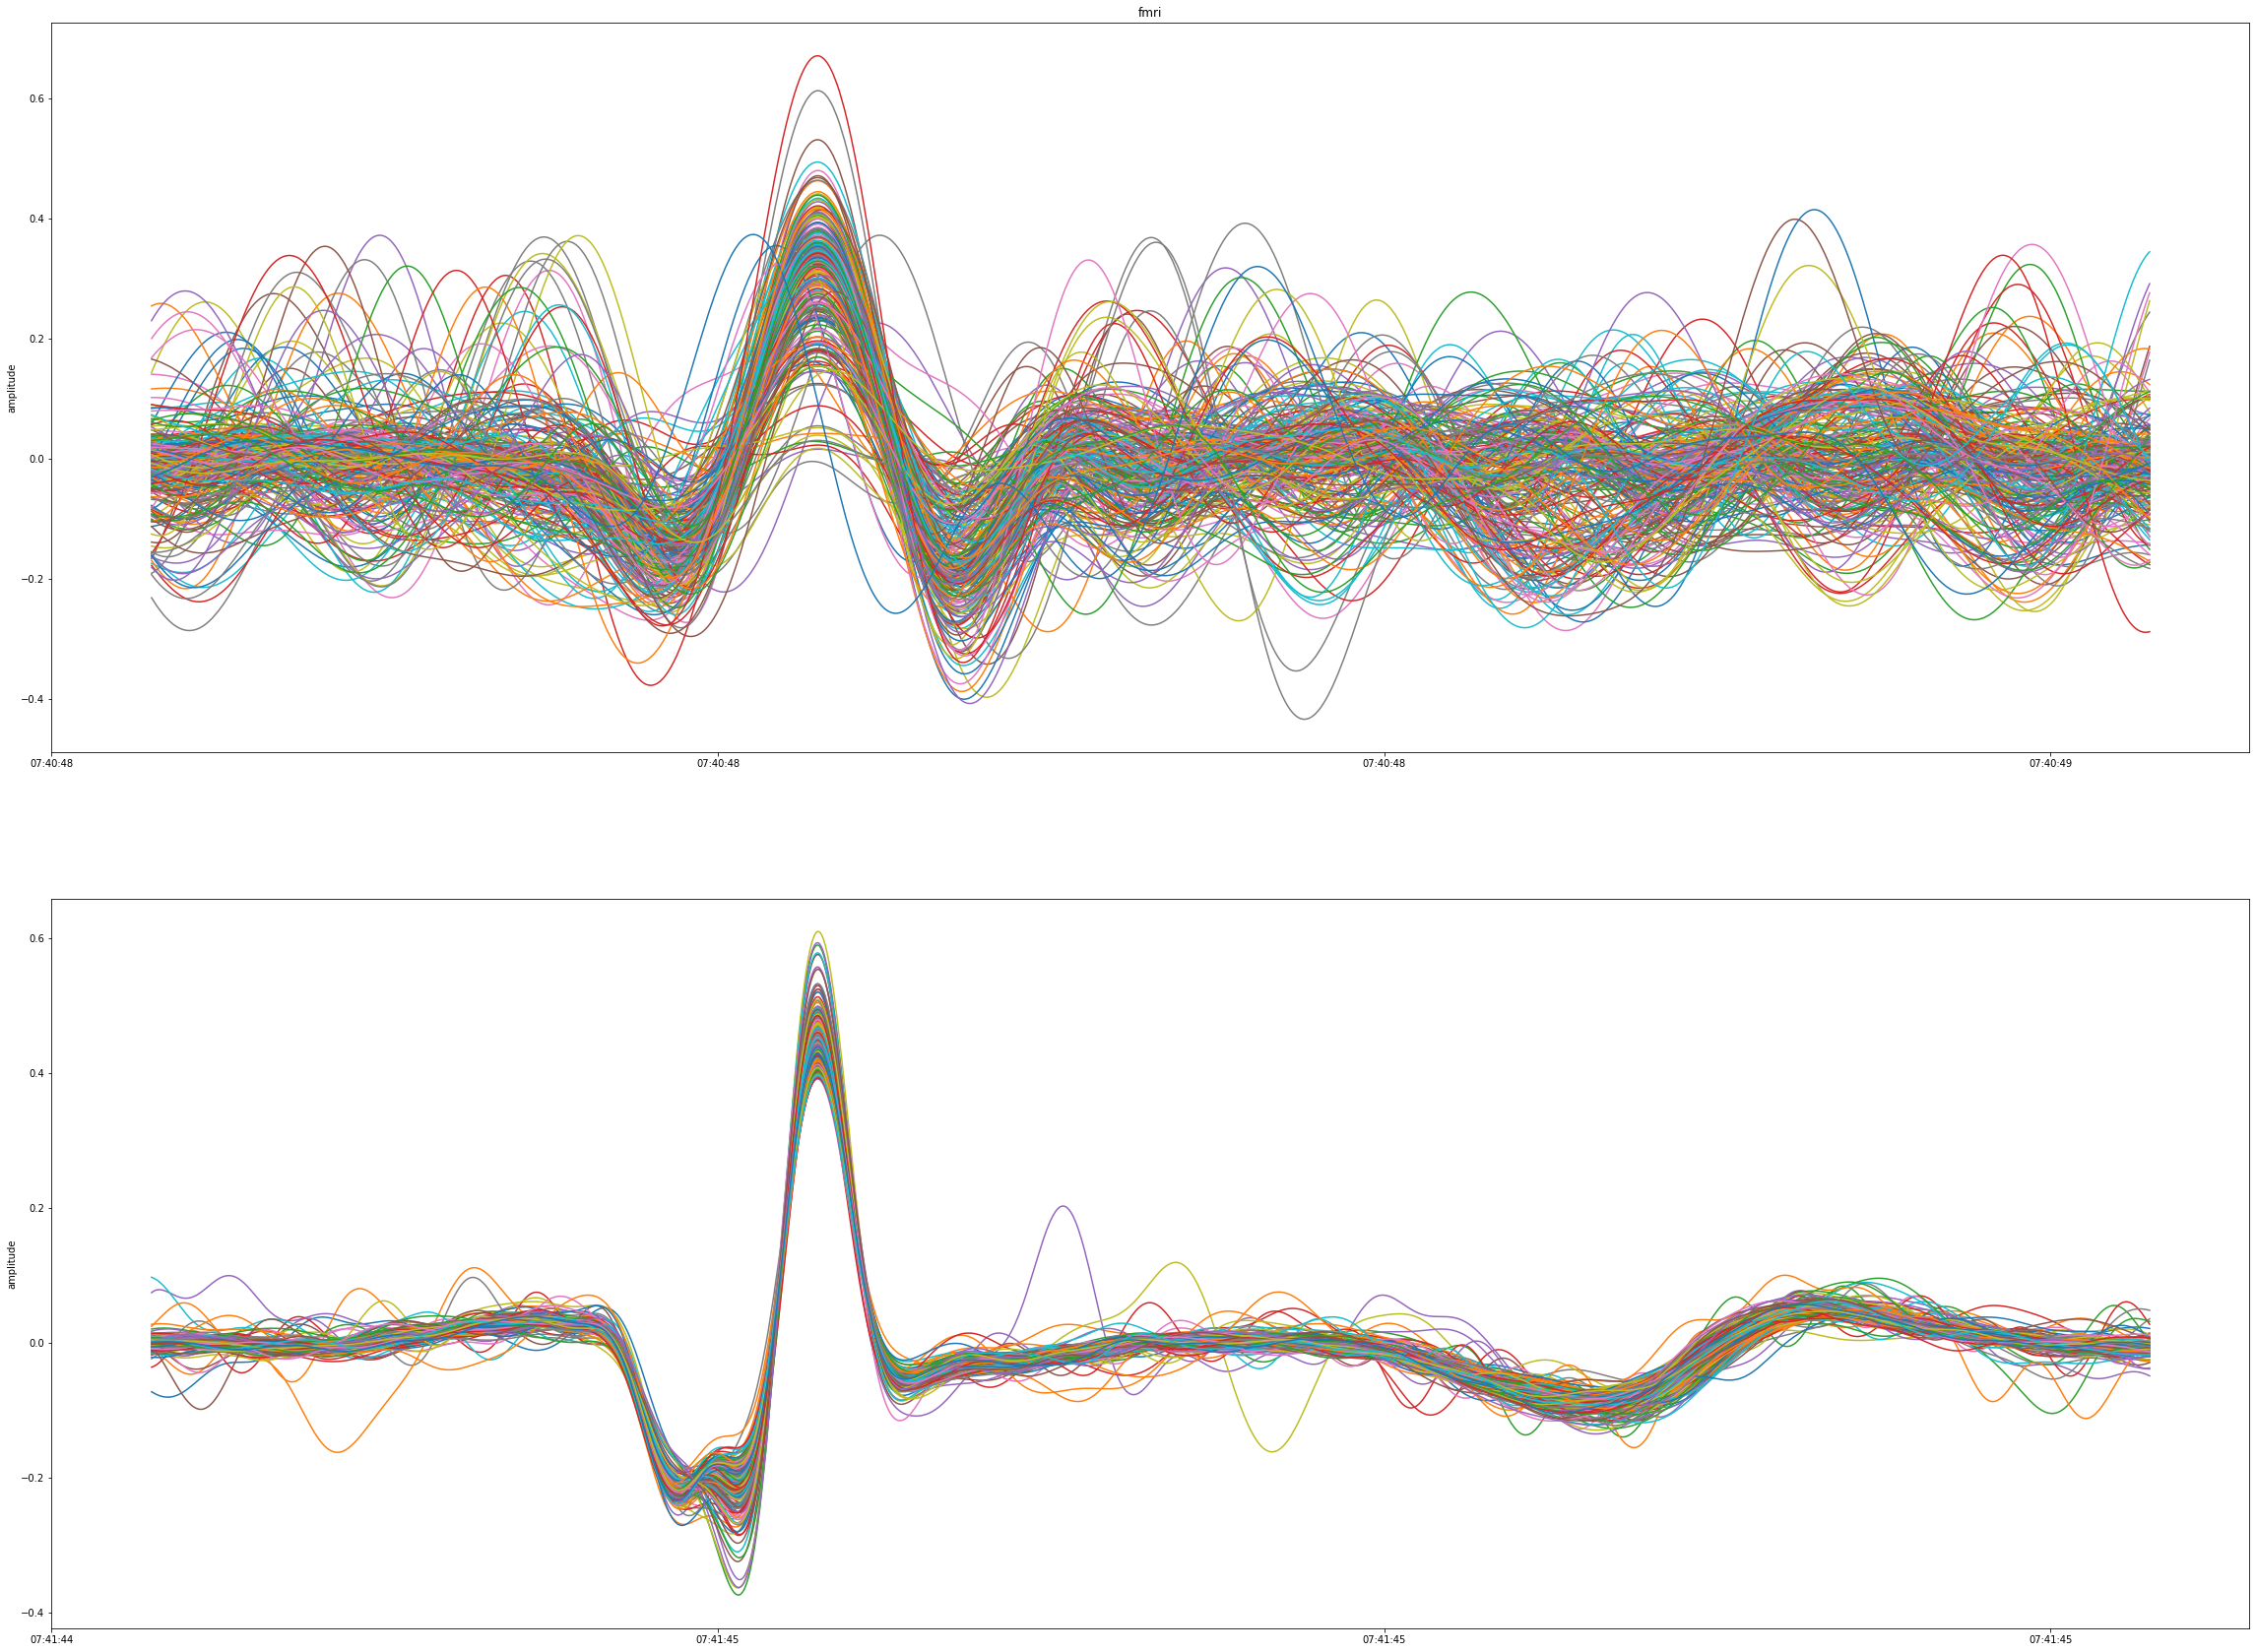

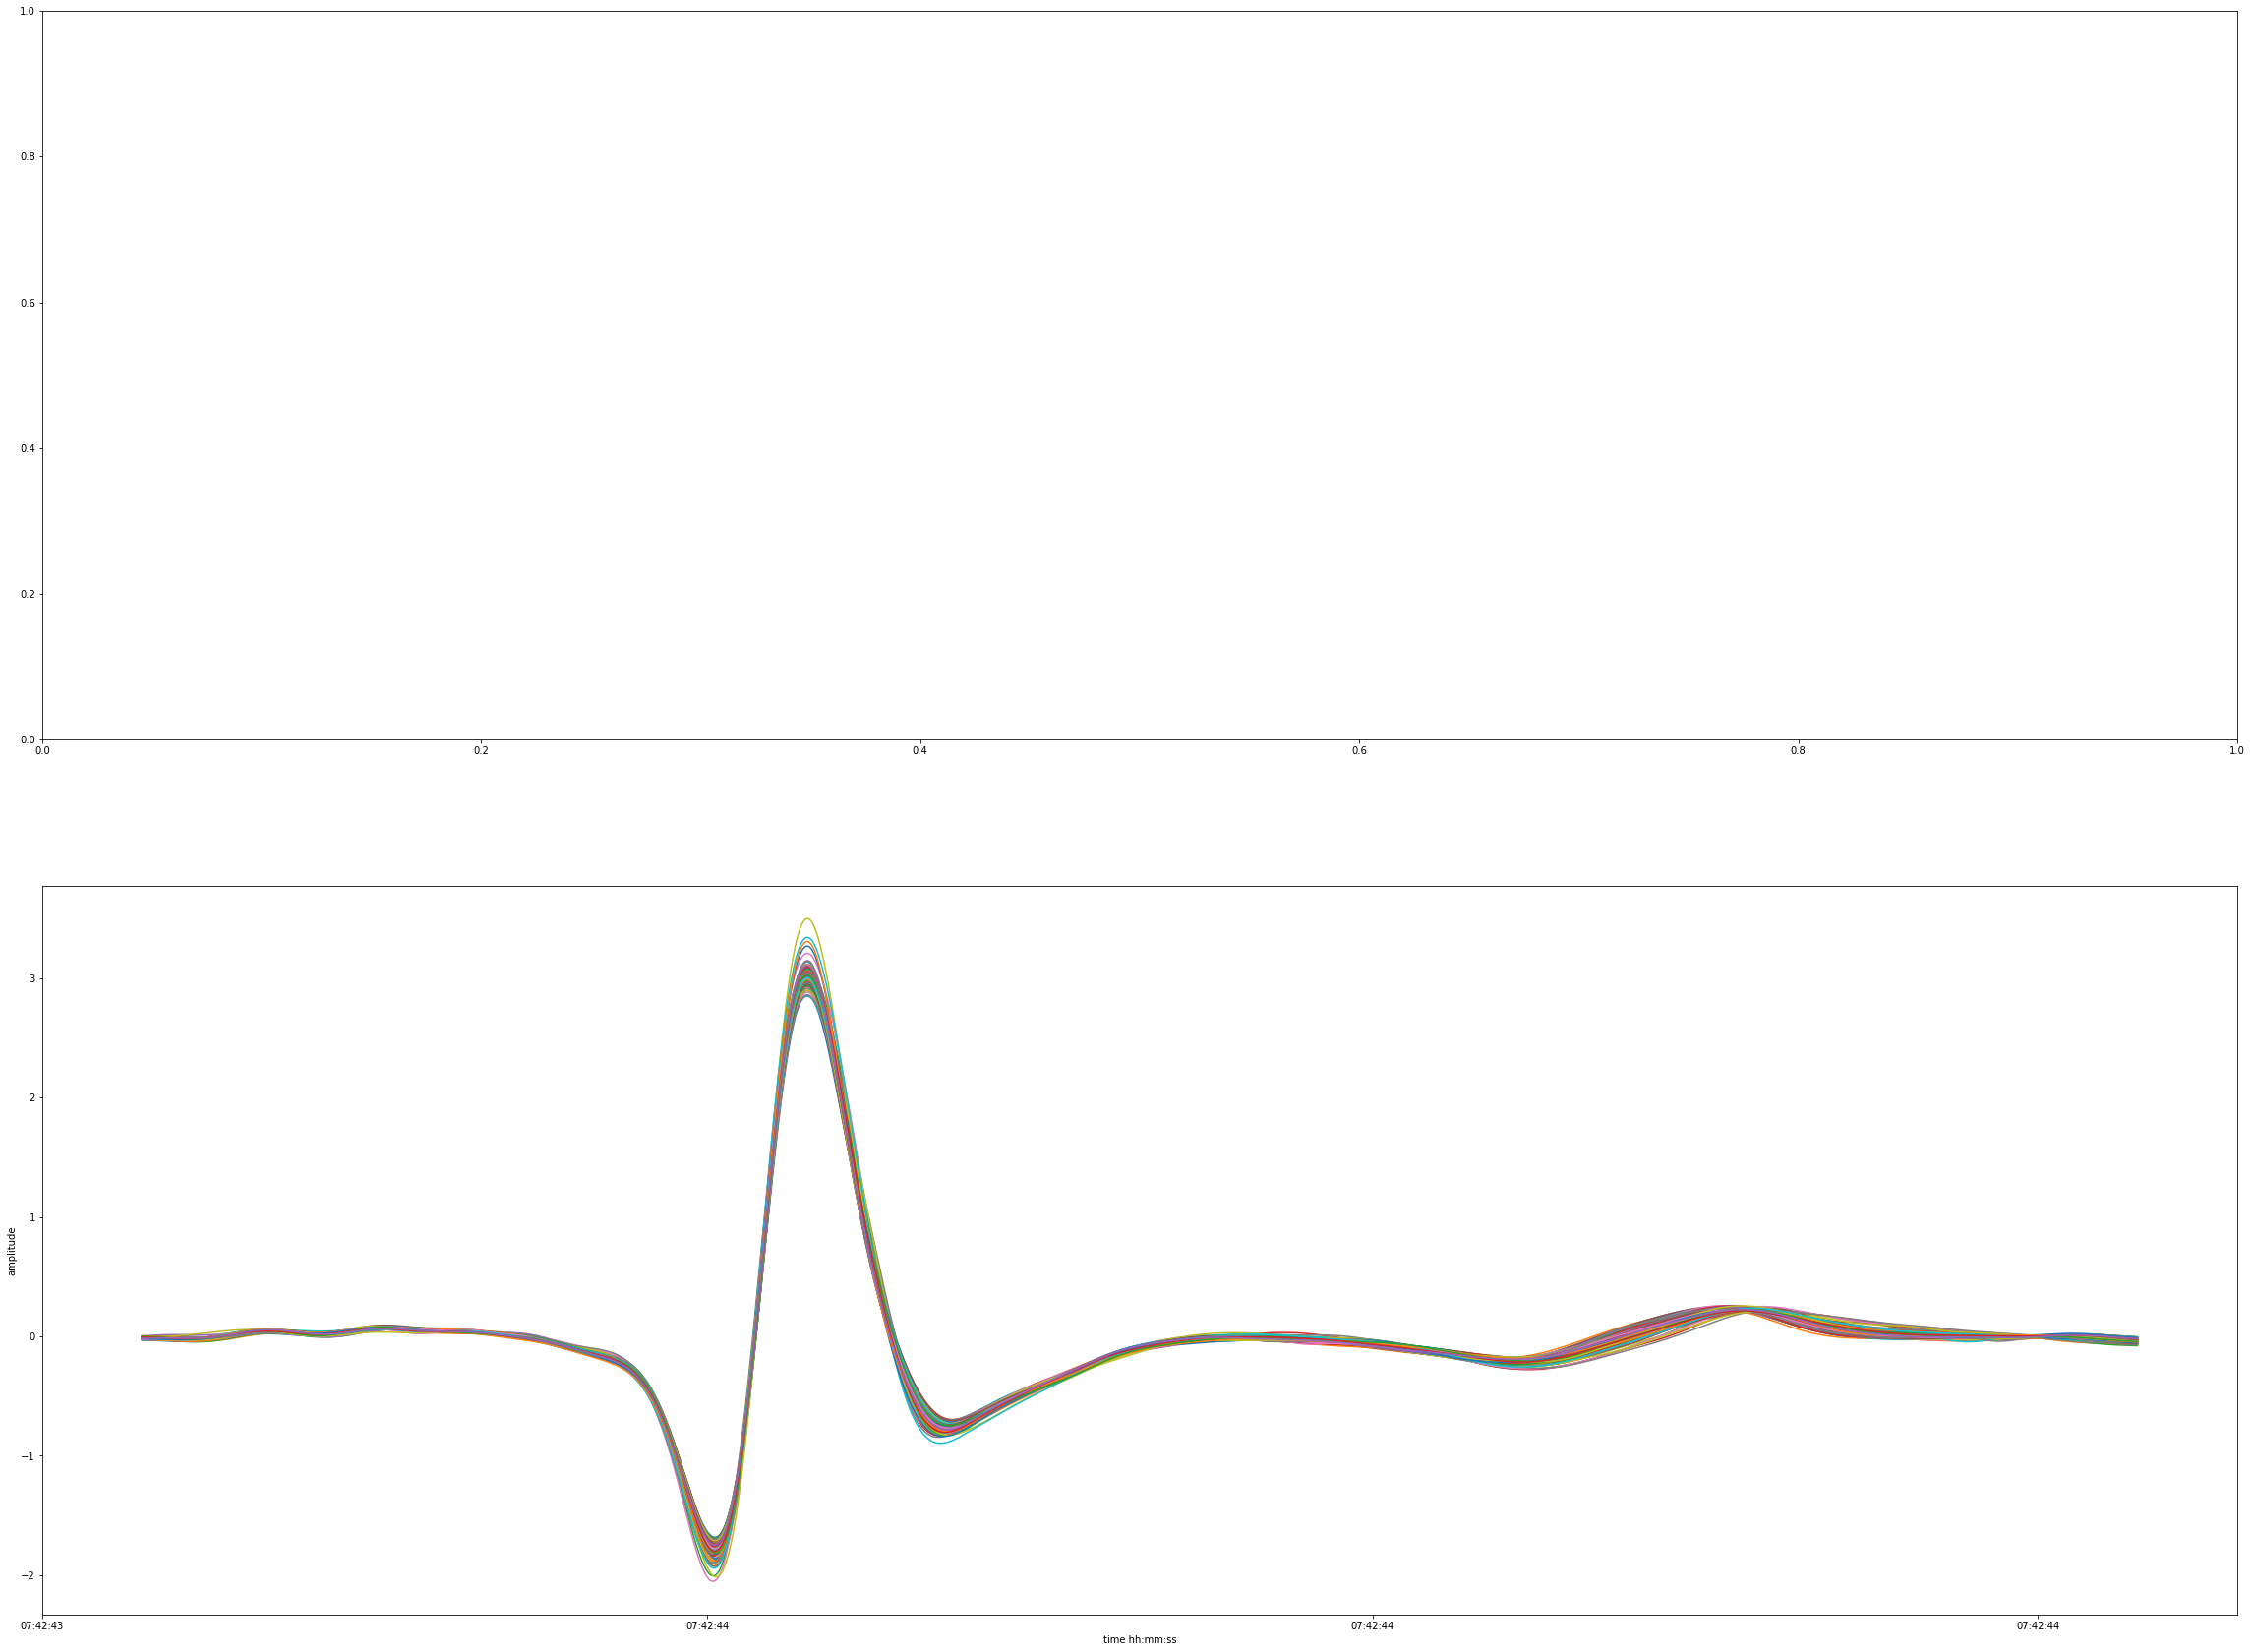

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.subplot(2, 1, 1)
plt.plot(fmri_cycles)
plt.title('fmri')
plt.ylabel('amplitude')

plt.subplot(2, 1, 2)
plt.plot(off_cycles)
plt.ylabel('amplitude')

plt.subplots(2, 1)
plt.plot(mock_cycles)
plt.ylabel('amplitude')
plt.xlabel('time hh:mm:ss')


plt.show()

## Measure of the signal's quality
From nk's docs :
**ECG Signal Quality**: Using the PTB-Diagnostic dataset available from PhysioNet, we extracted all the ECG signals from the healthy participants, that contained 15 recording leads/subject. We extracted all cardiac cycles, for each lead, and downsampled them from 600 to 200 datapoints. Note that we dropped the 8 first values that were NaNs. Then, we fitted a neural network model on 2/3 of the dataset (that contains 134392 cardiac cycles) to predict the lead. Model evaluation was done on the remaining 1/3. The model show good performances in predicting the correct recording lead (accuracy=0.91, precision=0.91). In this function, this model is fitted on each cardiac cycle of the provided ECG signal. It returns the probable recording lead (the most common predicted lead), the signal quality of each cardiac cycle (the probability of belonging to the probable recording lead) and the overall signal quality (the mean of signal quality).

In [27]:
from sklearn.externals import joblib

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
quality_fmri = nk.bio_ecg.ecg_signal_quality(fmri_cycles, 5000, quality_model="default")


C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [29]:
quality_off = nk.bio_ecg.ecg_signal_quality(off_cycles, 5000, quality_model="default")


C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [30]:
quality_mock = nk.bio_ecg.ecg_signal_quality(mock_cycles, 10000, quality_model="default")

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [32]:
quality_mock.keys()

dict_keys(['Probable_Lead', 'Cardiac_Cycles_Signal_Quality', 'Average_Signal_Quality'])

In [33]:
quality_fmri['Average_Signal_Quality']

0.24036471669392936

In [34]:
quality_off['Average_Signal_Quality']

0.6990905498261412

In [35]:
quality_mock['Average_Signal_Quality']

0.6812260165621054

## Next step, compare segmentation 

## Then, 4th order central-moment filter design